In [2]:
%matplotlib inline
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [3]:
csds = pd.read_csv('bd.csv')
print len(csds)
csds.head(n=10)

14999


,trans_id,equip_id,hduration,source_id,destination_id,dob,st_time,end_time,source_name,destination_name,usertype,gender,Age
0,1000,Seeder,48,ST-4,ST-5,1988,3/4/2018 20:23,3/6/2018 20:23,Station4,Station5,Member,Female,32
1,1001,Tractor,22,ST-1,ST-2,1986,3/9/2018 3:08,3/10/2018 1:08,Station1,Station2,Member,Female,34
2,1002,Seeder,66,ST-4,ST-2,1987,5/2/2018 7:25,5/5/2018 1:25,Station4,Station2,Member,Female,33
3,1003,Harvester,86,ST-5,ST-1,1990,3/15/2018 13:04,3/19/2018 3:04,Station5,Station1,Member,Female,30
4,1004,Seeder,99,ST-1,ST-5,1985,3/9/2018 6:52,3/13/2018 9:52,Station1,Station5,Member,Female,35
5,1005,Harvester,77,ST-3,ST-1,1989,4/8/2018 11:50,4/11/2018 16:50,Station3,Station1,Member,Female,31
6,1006,Harvester,65,ST-5,ST-1,1986,3/12/2018 11:10,3/15/2018 4:10,Station5,Station1,Member,Female,34
7,1007,Tractor,42,ST-3,ST-5,1987,3/12/2018 7:23,3/14/2018 1:23,Station3,Station5,Member,Female,33
8,1008,Tractor,24,ST-5,ST-1,1987,4/4/2018 2:03,4/5/2018 2:03,Station5,Station1,Member,Female,33
9,1009,Harvester,106,ST-5,ST-1,1988,5/3/2018 17:06,5/8/2018 3:06,Station5,Station1,Member,Female,32


In [4]:
csds = csds.sort_values(by='st_time')
csds.reset_index()
print 'Scope of dataset: %s - %s'%(csds.loc[1, 'st_time'],
csds.loc[len(csds)-1, 'end_time'])

Scope of dataset: 3/9/2018 3:08 - 3/9/2018 19:46


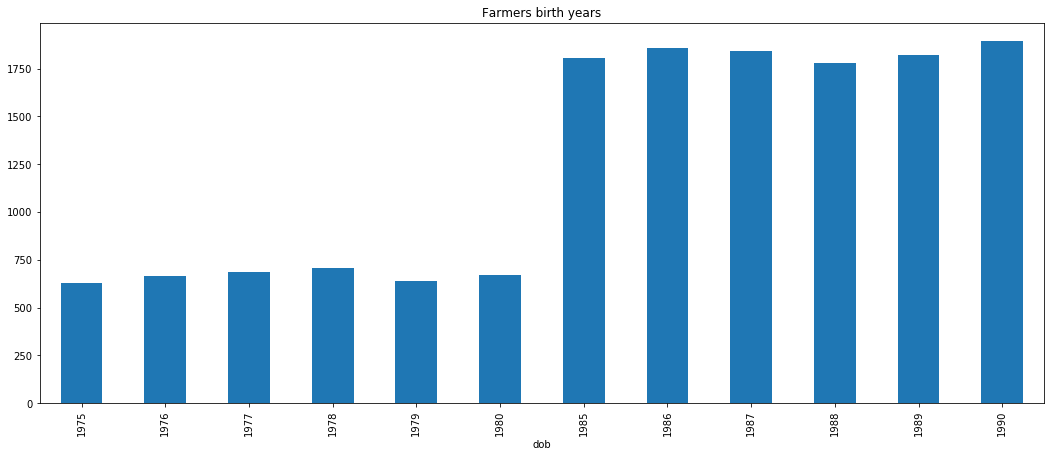

In [5]:
csds = csds.sort_values(by='dob')
gpby_dob = csds.groupby('dob').size()
gpby_dob.plot.bar(title = 'Farmers birth years',figsize = (18,7))

(-1.2056332193673052,
 1.1179953123450832,
 -1.1000398358621846,
 1.1000018969458139)

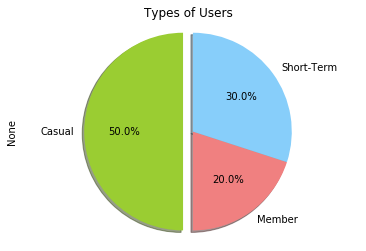

In [6]:
csds = csds.sort_values(by='usertype')
gpby_usertype = csds.groupby('usertype').size()
explode = (0.1, 0, 0)
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
gpby_usertype.plot.pie(title = 'Types of Users',explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

(-1.1605441299129462,
 1.1075265018555567,
 -1.1065734153651254,
 1.1060360838638963)

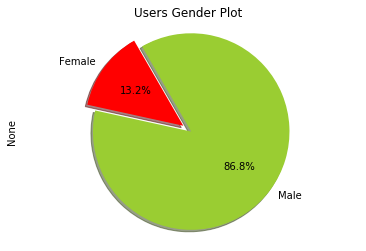

In [7]:
csds = csds.sort_values(by='gender')
gpby_gender = csds.groupby('gender').size()
explode = (0.1, 0)
colors = ['red', 'yellowgreen']
gpby_gender.plot.pie(title = 'Users Gender Plot',explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal')

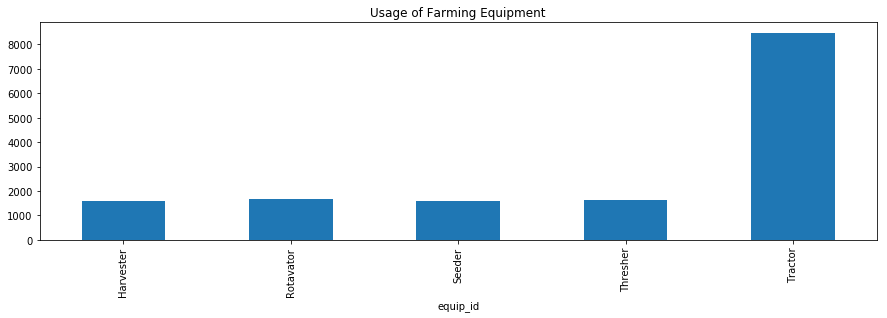

In [8]:
csds = csds.sort_values(by='equip_id')
gpby_equip = csds.groupby('equip_id').size()
gpby_equip.plot.bar(title = 'Usage of Farming Equipment', figsize = (15,4))

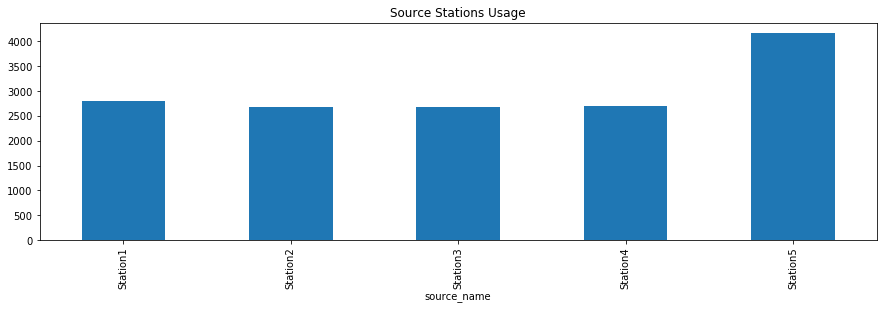

In [9]:
csds = csds.sort_values(by='source_name')
gpby_source = csds.groupby('source_name').size()
gpby_source.plot.bar(title = 'Source Stations Usage',figsize = (15,4))

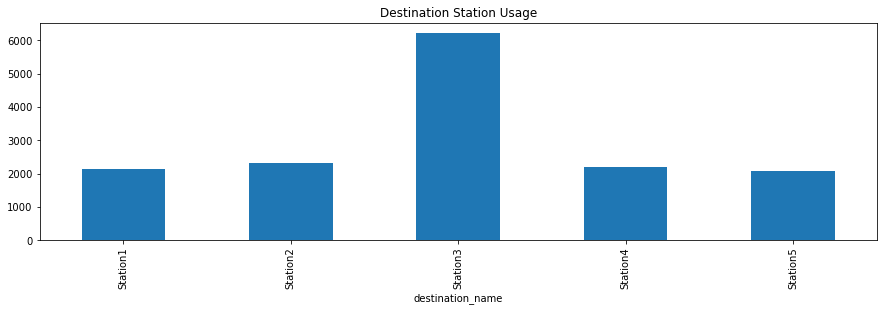

In [10]:
csds = csds.sort_values(by='destination_name')
gpby_destination = csds.groupby('destination_name').size()
gpby_destination.plot.bar(title = 'Destination Station Usage',figsize = (15,4))

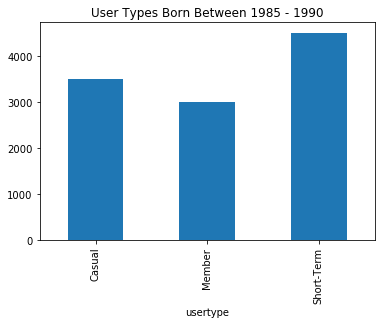

In [11]:
csds_max = csds[(csds['dob'] >= 1985) & (csds['dob']<=1991)]
gpby_max = csds_max.groupby('usertype').size()
gpby_max.plot.bar(title = 'User Types Born Between 1985 - 1990')

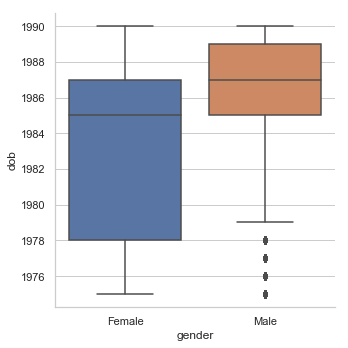

In [12]:
seaborn.set(style="whitegrid")
#seaborn.boxplot(x='gender',y='dob',data=csdata)
g=seaborn.catplot("gender", "dob", data=csds, kind="box")
#g.seaborn.set_axis_labels("DOB", "Gender");   

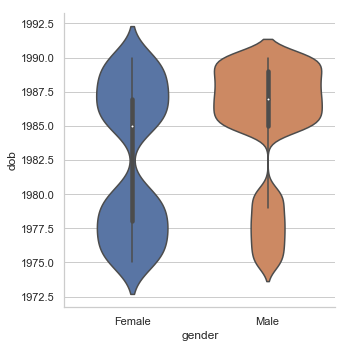

In [13]:
seaborn.catplot(x="gender", y="dob", kind="violin", data=csds);

In [14]:
ml_ = list(csds['st_time'])
ml_ = [datetime.datetime.strptime(i, '%m/%d/%Y %H:%M') for i in ml_]
csds['stm'] = pd.Series(ml_,index=csds.index)
csds['std'] = pd.Series([i.date() for i in ml_],index=csds.index)
csds['sty'] = pd.Series([i.year for i in ml_],index=csds.index)
csds['stmo'] = pd.Series([i.month for i in ml_],index=csds.index)
csds['stda'] = pd.Series([i.day for i in ml_],index=csds.index)
csds['sth'] = pd.Series([i.hour for i in ml_],index=csds.index)

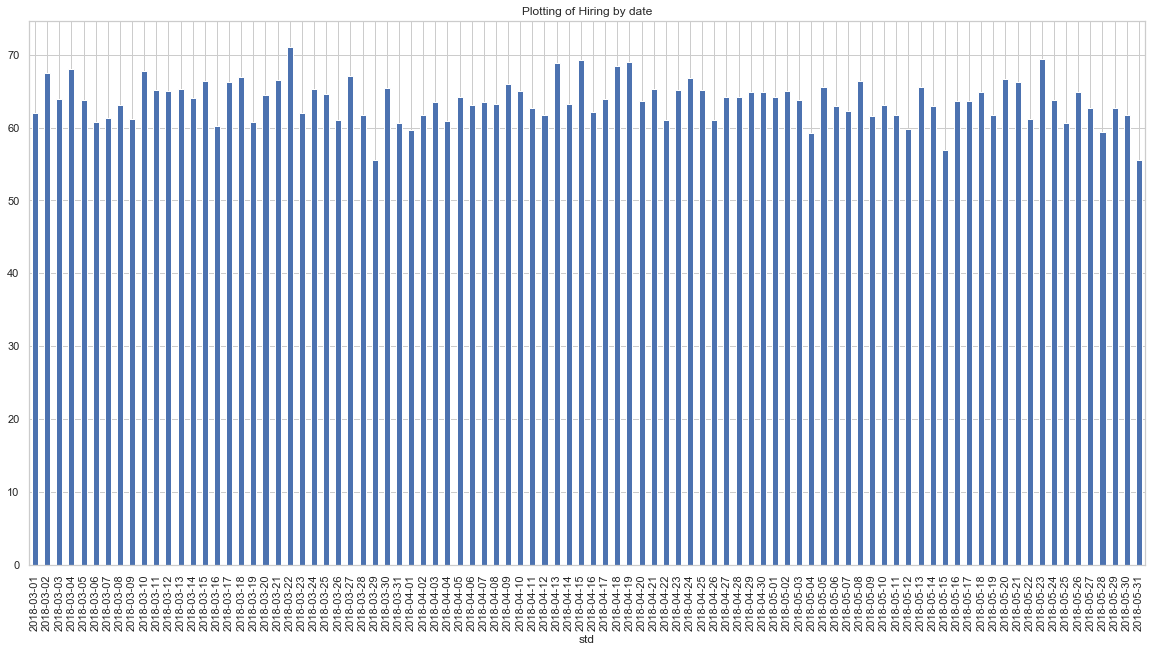

In [15]:
csds.groupby('std')['hduration'].mean().plot.bar(title = 'Plotting of Hiring by date', figsize = (20,10))

In [16]:
hireduration = list(csds['hduration'])
source_from = list(csds['source_name'])
print 'Hiring duration (Mean): %f'%statistics.mean(hireduration)
print 'Hiring duration (Median): %f'%statistics.median(hireduration)
print 'Starting Station from (Mode Value): %s'%statistics.mode(source_from)

Hiring duration (Mean): 63.749317
Hiring duration (Median): 63.000000
Starting Station from (Mode Value): Station5


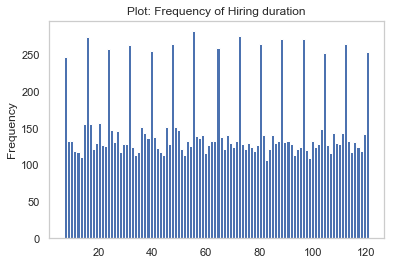

In [17]:
csds['hduration'].plot.hist(bins=100, title='Plot: Frequency of Hiring duration',grid=False)

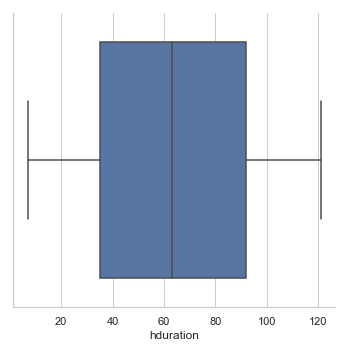

In [18]:
seaborn.catplot("hduration",data=csds, kind="box")

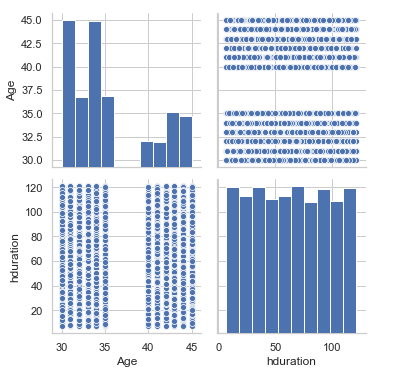

In [19]:
csds = csds.dropna()
g=seaborn.pairplot(csds, vars=['Age', 'hduration'],kind = "scatter")
plt.show()

In [20]:
pd.set_option('display.width', 50)
pd.set_option('precision', 4)
corr = csds[['hduration','Age']].corr(method='pearson')
print(corr)

           hduration    Age
hduration      1.000  0.005
Age            0.005  1.000
